#  Проект

Обработка изображений встречается во многих практических задачах. Допустим, вы реализуете систему безопасности и хотите идентифицировать людей, входящих в офис. Эта задача содержит в себе множество подзадач: разбивка видео на кадры, определение людей и их лиц, сверка найденных лиц с базой данных сотрудников и так далее.

Для решения некоторых из них вам потребуется знание машинного обучения, поэтому мы их отложим на потом. А пока что попробуем решить одну из них — **выделение лиц (face detection)**.

Библиотеки Python имеют огромное преимущество — они часто распространяются с примерами использования, данными и моделями. В частности, в библиотеке skimage есть некоторое количество картинок, чтобы вы могли отлаживать ваши алгоритмы, а также есть модель для распознавания **(сегментации) лиц**.

Давайте закрепим знания и попробуем применить эту модель!

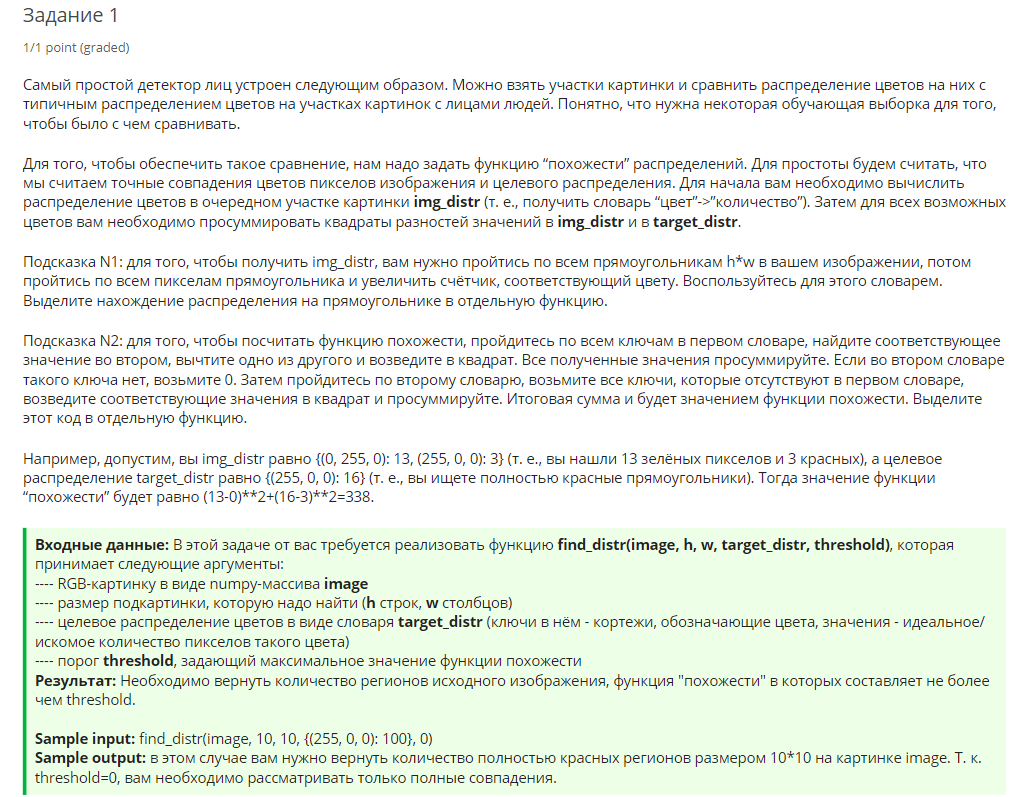

In [68]:
def calc_d(img):
    dic = {}
    for row in img:
        for j in row:
            j = tuple(j)
            dic[j]= dic.get(j,0)+1
    return dic

In [1]:
# Напишите ваш код ниже

import numpy as np
def calc_distr(img):
    distr = {}
    for row in img:
        for item in row:
            pixel = tuple(x for x in item)
            distr[pixel] = distr.get(pixel, 0) + 1
    return distr


def similarity(a, b):
    result = 0
    for key, value in a.items():
        result += (value - b.get(key, 0))**2
    for key, value in b.items():
        if key in a:
            continue
        result += value**2
    return result


def find_distr(image, h, w, target_distr, threshold):
    itog =0
    size1 = image.shape[1] - h + 1
    size0 = image.shape[0] -w + 1
    for i in range(0,size1):
        a = w
        for m in range(0, size0):
            img = image[i:h, m:a]
            distr = calc_distr(img)
            sim = similarity(distr, target_distr)
            a = a + 1
            if sim <=threshold:
                itog +=1
        h = h + 1
    return itog

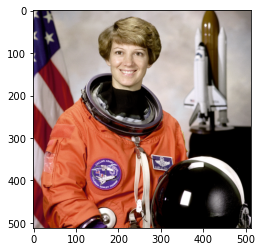

In [2]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

image = data.astronaut()
plt.imshow(image)

In [8]:
find_distr(image, 1, 2, {(255, 0, 0): 100}, 0)

0

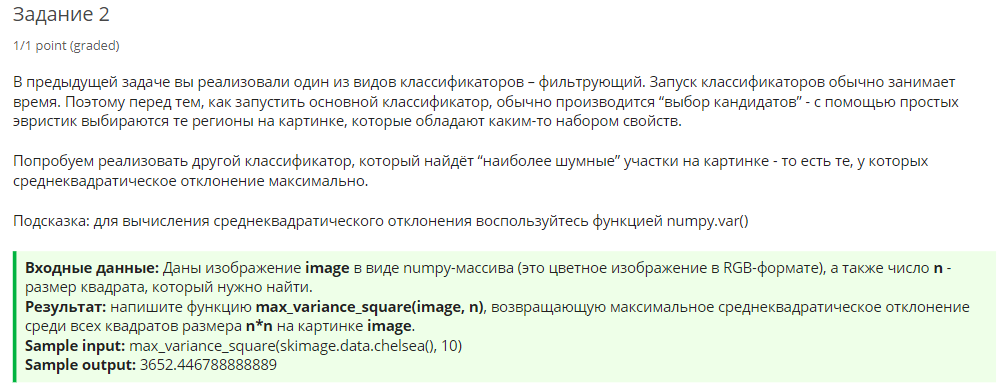

In [6]:
import skimage

def max_variance_square(image, n):
    size1 = image.shape[1] - n + 1
    size0 = image.shape[0] -n + 1
    b = []
    for i in range(0,size1):
        for m in range(0, size0):
            img = image[i:i+n, m:m+n]
            b.append(np.var(img))
    return max(b)
max_variance_square(skimage.data.chelsea(), 10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3652.446788888889

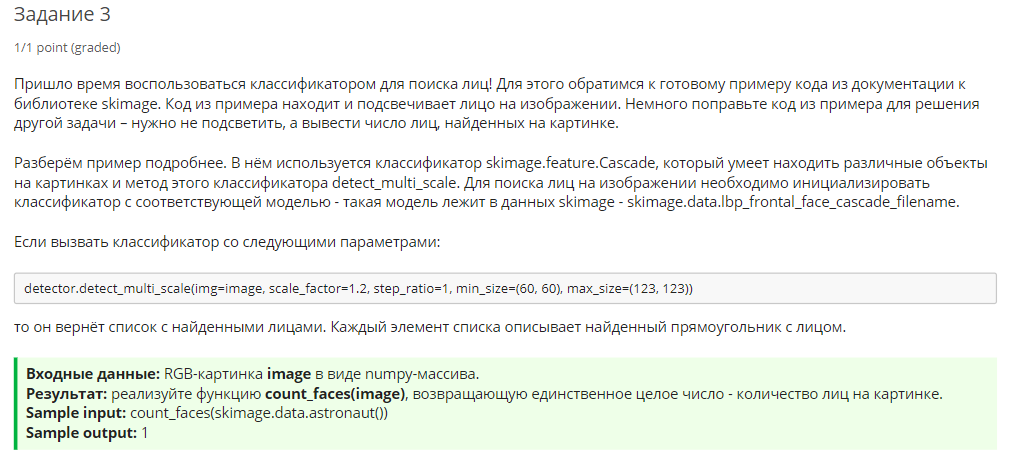

In [9]:
def count_faces(image):
    from skimage.data import lbp_frontal_face_cascade_filename
    from skimage.feature import Cascade
    trained_file = lbp_frontal_face_cascade_filename()
    detector = Cascade(trained_file)
    return len(detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123)))

count_faces(skimage.data.astronaut())

1

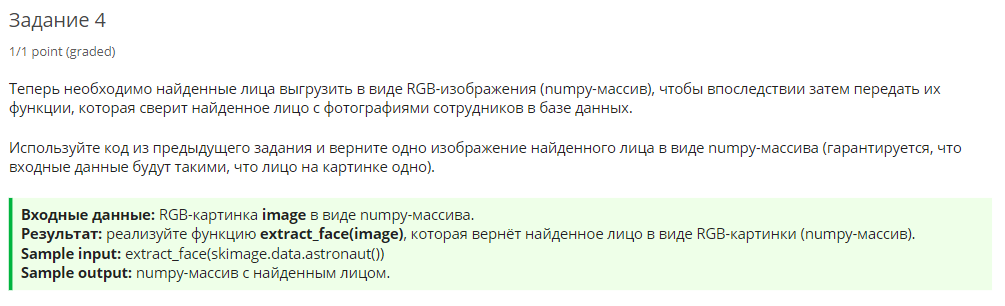

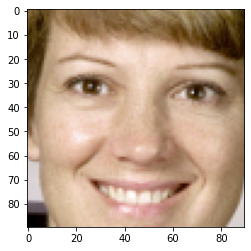

In [13]:
import matplotlib.pyplot as plt
import skimage
import skimage.feature
# from skimage import data
# from skimage import feature
# from skimage.data import lbp_frontal_face_cascade_filename
# from skimage.feature import Cascade
import skimage
import skimage.feature
import numpy as np
from skimage.io import imread
def extract_face(image):
    trained_file = skimage.data.lbp_frontal_face_cascade_filename()
    detector = skimage.feature.Cascade(trained_file)
    b = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123))
    return skimage.data.astronaut()[b[0]['r']:b[0]['r']+b[0]['height'],b[0]['c']:b[0]['c']+b[0]['width']]

plt.imshow(extract_face(skimage.data.astronaut()))

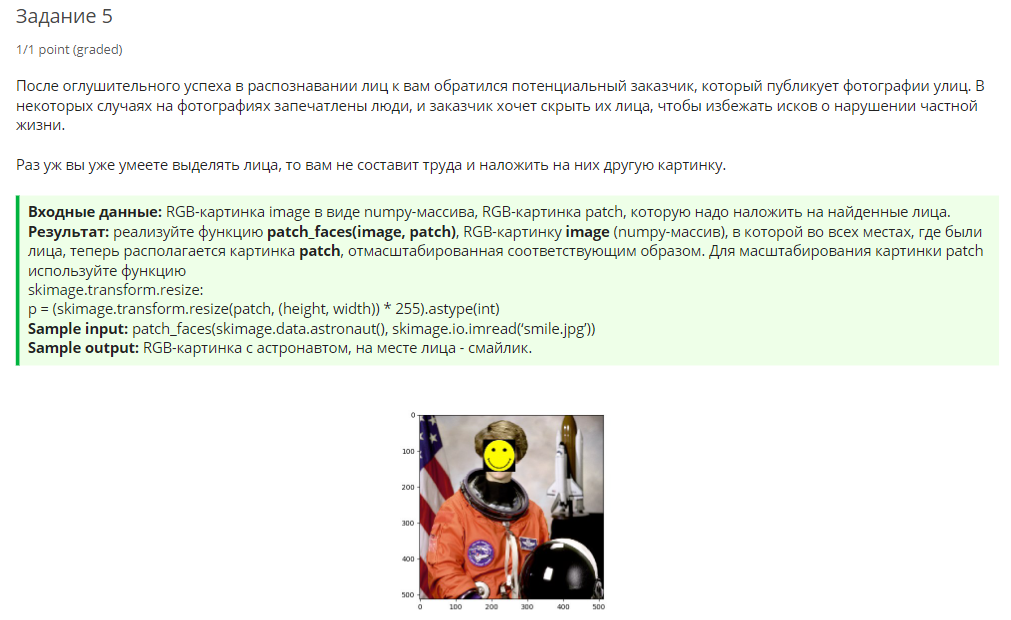

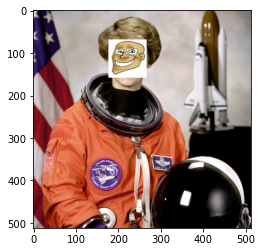

In [14]:
import skimage
import skimage.feature
from skimage import io
def  patch_faces(image, patch):    
    trained_file = skimage.data.lbp_frontal_face_cascade_filename()
    detector = skimage.feature.Cascade(trained_file)
    b = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123))
    
    for i in range(len(b)):
        r, h, c, w = b[i]['r'],b[i]['height'],b[i]['c'],b[i]['width']
        resized_patch = (skimage.transform.resize(patch, (h, w)) * 255).astype(int)
        image[r:r+h, c:c+w] = resized_patch
    return image

plt.imshow(patch_faces(skimage.data.astronaut(), skimage.io.imread('smile.jpg')))
